In [2]:
import numpy as np
import pandas as pd

%precision 3

'%.3f'

In [5]:
df = pd.read_csv('../stat_analysis/data/ch2_scores_em.csv',
                 index_col = 'student number')

In [7]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A','B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name = 'Student'))
scores_df

,english,mathematics
Student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [11]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviation'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
Student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [12]:
summary_df['product of deviation'].mean()

62.800

In [13]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [14]:
cov_mat[0,0], cov_mat[1,1]

(86.000, 68.440)

In [16]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

In [17]:
cov_mat[0,1], cov_mat[1,0]

(62.800, 62.800)

In [18]:
np.cov(en_scores, ma_scores, ddof=0)[0,1] /\
(np.std(en_scores) * np.std(ma_scores))

0.819

In [19]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [20]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

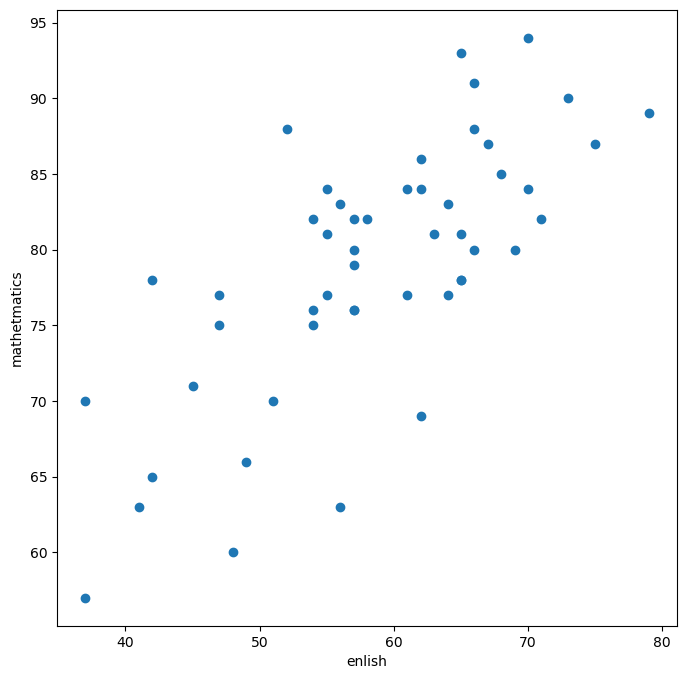

In [34]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
#산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('enlish')
ax.set_ylabel('mathetmatics')

plt.show()

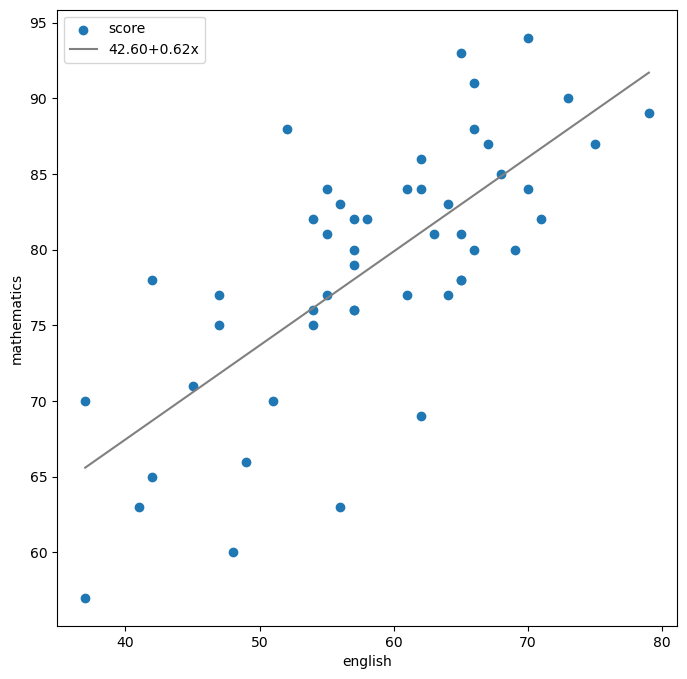

In [35]:
# 게수 β_0와 β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
#범레의 표시
ax.legend(loc='upper left')

plt.show()

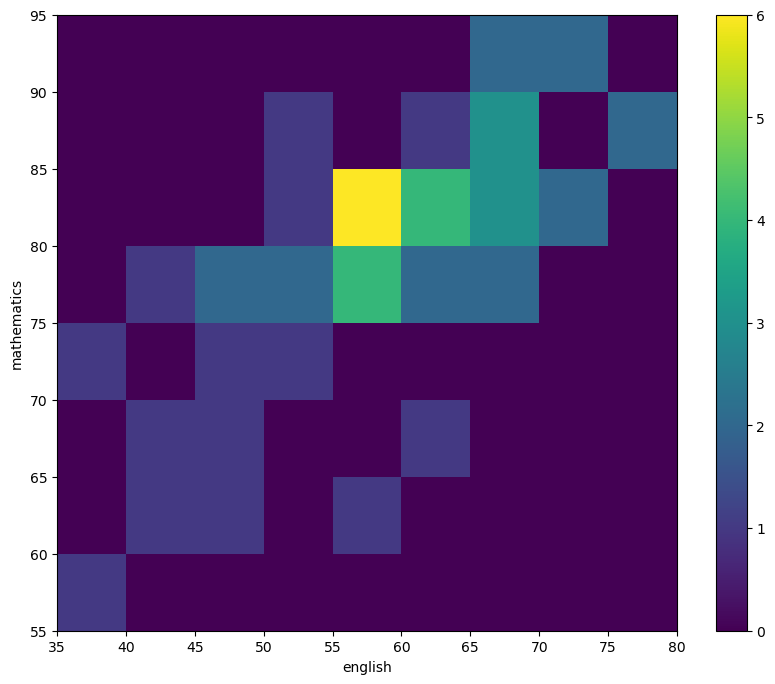

In [37]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9,8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
#컬러 바의 표시
fig.colorbar(c[3], ax=ax)
plt.show()

In [43]:
# npy 형식으로 저장된 NumPy array를 읽어들인다
anscombe_data = np.load('../stat_analysis/data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [45]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
    [f'{np.mean(dataX):.2f}',
     f'{np.var(dataX):.2f}',
     f'{np.mean(dataY):.2f}',
     f'{np.var(dataY):.2f}',
     f'{np.corrcoef(dataX, dataY)[0,1]:.2f}',
     f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df
    

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


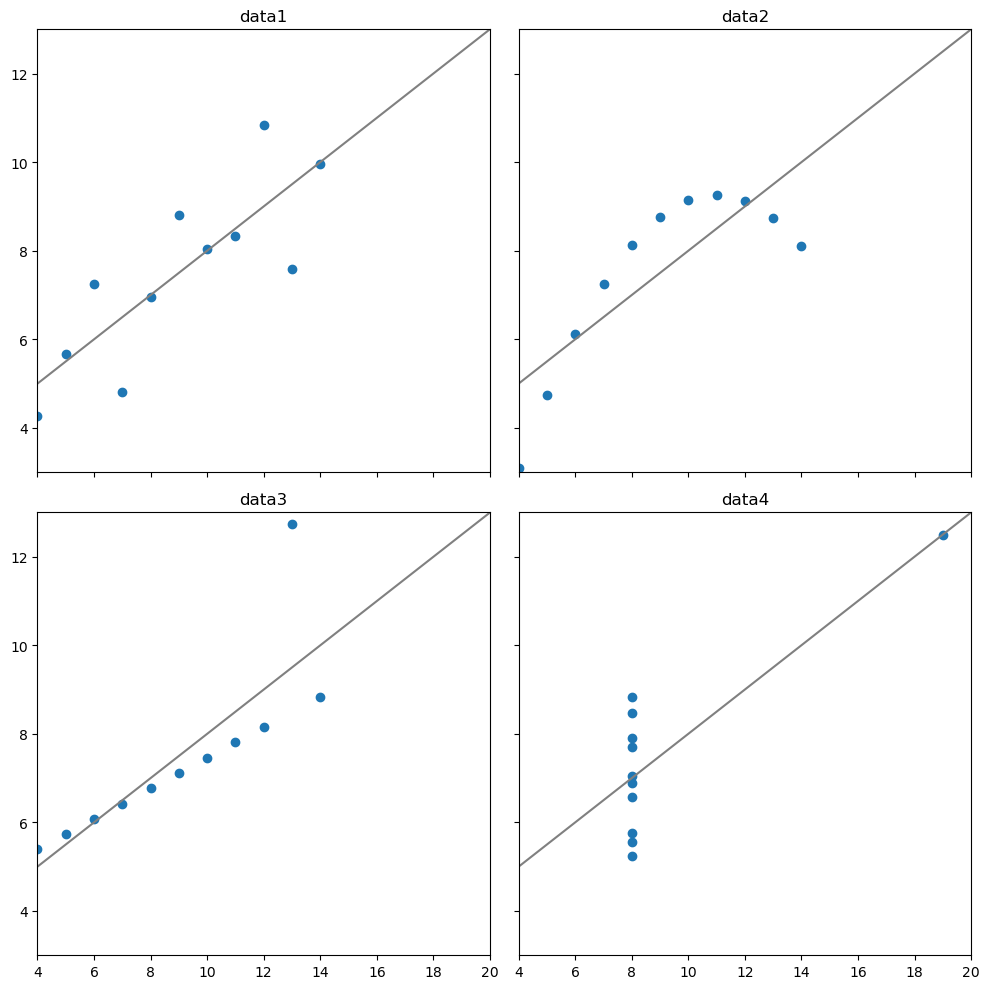

In [52]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

#그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()

In [54]:
import pandas as pd

In [57]:
df = pd.read_csv('../stat_analysis/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [58]:
np.random.choice([1,2,3],3)

array([2, 3, 2])

In [59]:
np.random.choice([1,2,3], 3, replace=False)

array([1, 3, 2])

In [60]:
np.random.seed(0)
np.random.choice([1,2,3], 3)

array([1, 2, 1])

In [61]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.400

In [64]:
scores.mean()

69.530

In [65]:
for i in range(5) :
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번쨰 무작위 추출로 얻은 표본평균', sample.mean())

1번쨰 무작위 추출로 얻은 표본평균 73.45
2번쨰 무작위 추출로 얻은 표본평균 59.85
3번쨰 무작위 추출로 얻은 표본평균 67.75
4번쨰 무작위 추출로 얻은 표본평균 73.8
5번쨰 무작위 추출로 얻은 표본평균 73.3


In [66]:
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [67]:
num_trial= 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5, 3,
       4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6, 5,
       5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2, 2,
       6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2, 4,
       1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4, 6])

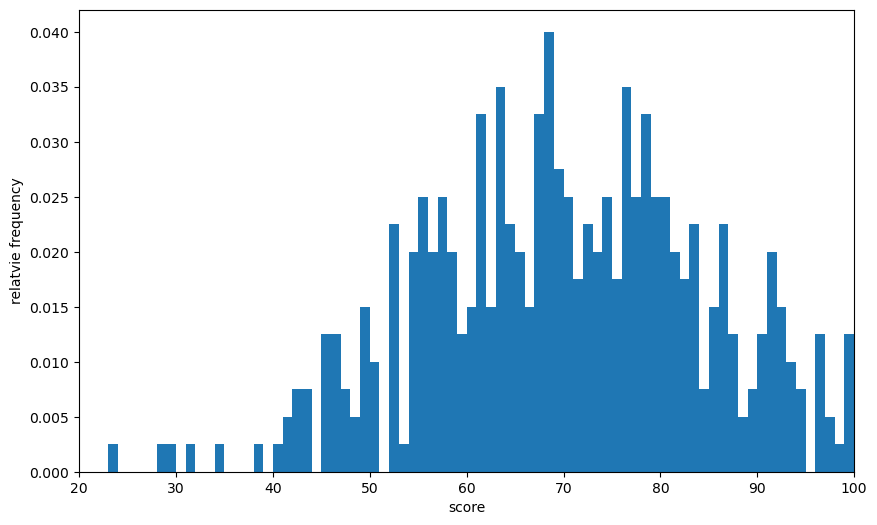

In [68]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relatvie frequency')
plt.show()

In [69]:
np.random.choice(scores)

np.int64(42)

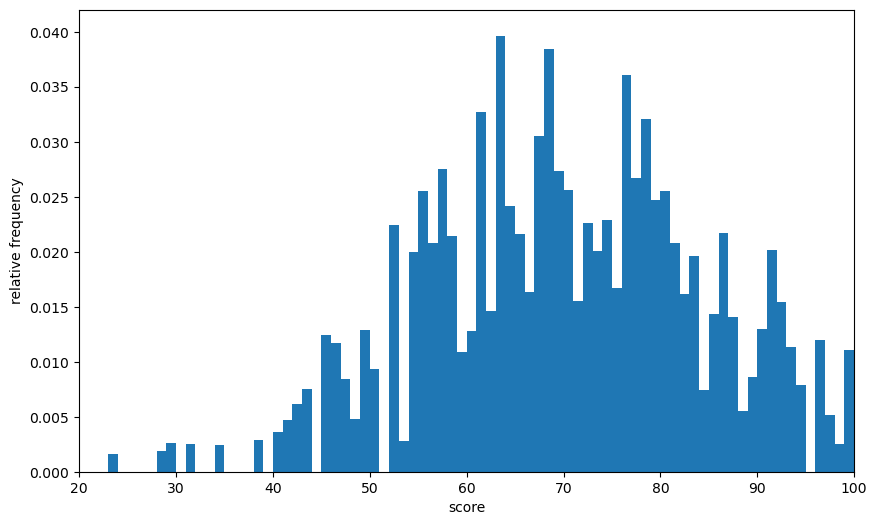

In [71]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

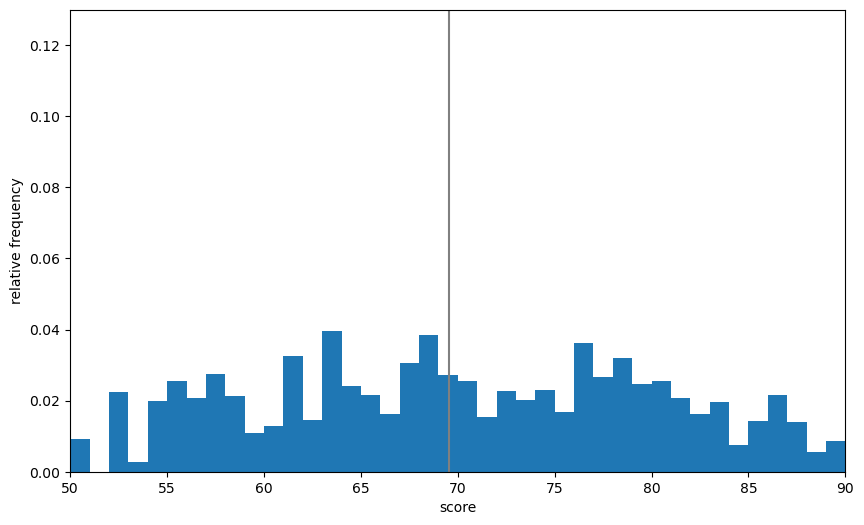

In [73]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density=True)
#모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50,90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()